In [39]:
import os
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import holoviews as hv
import hvplot.pandas
from plotly import subplots 
from plotly import tools 
import chart_studio
import chart_studio.plotly as py

import cufflinks as cf
cf.set_config_file(theme='solar', sharing='public', offline=True)
%matplotlib inline 

### Read in all csv files for analysis for Australia

In [17]:
#Load csv files
gdp = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
gdp_bar = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
cash_rate = pd.read_csv("../Data/ProcessedData/cashrate_cleaned.csv")
population = pd.read_csv("../Data/ProcessedData/Population_June_Cleaned.csv")
employment = pd.read_csv("../Data/ProcessedData/employment_cleaned.csv")
economy = pd.read_csv("../Data/ProcessedData/Economy_June_Cleaned.csv")
household_income = pd.read_csv("../Data/ProcessedData/Household_Income_cleaned.csv")

### What does the Australian GDP look like? Is AUS GDP similar for the same time-period (1995 - 2020) across countries in similar economic arenas?

In [18]:
# Rename Year column
gdp_new = gdp.rename(columns={"Unnamed: 0": "Year"})
gdp_bar_new = gdp.rename(columns={"Unnamed: 0": "Year"})

# Set index for 1st df and convert Year to object for 2nd df
gdp_new.set_index("Year", inplace=True)
gdp_bar_new["Year"] = gdp_bar_new.Year.astype(str)
#gdp_drop_unnamed = gdp_new.loc[:, ~gdp_new.columns.str.contains('^Unnamed')]

In [19]:
#Create bar chart
gdp_hvplot_bar = gdp_bar_new.hvplot.bar(groupby="Year")
gdp_hvplot_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [20]:
#Create line plots
gdp_hvplot_line = gdp_new.hvplot.line()
gdp_hvplot_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [21]:
comb_gdp = gdp_hvplot_line + gdp_hvplot_bar #+ gdp_iplot
comb_gdp

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

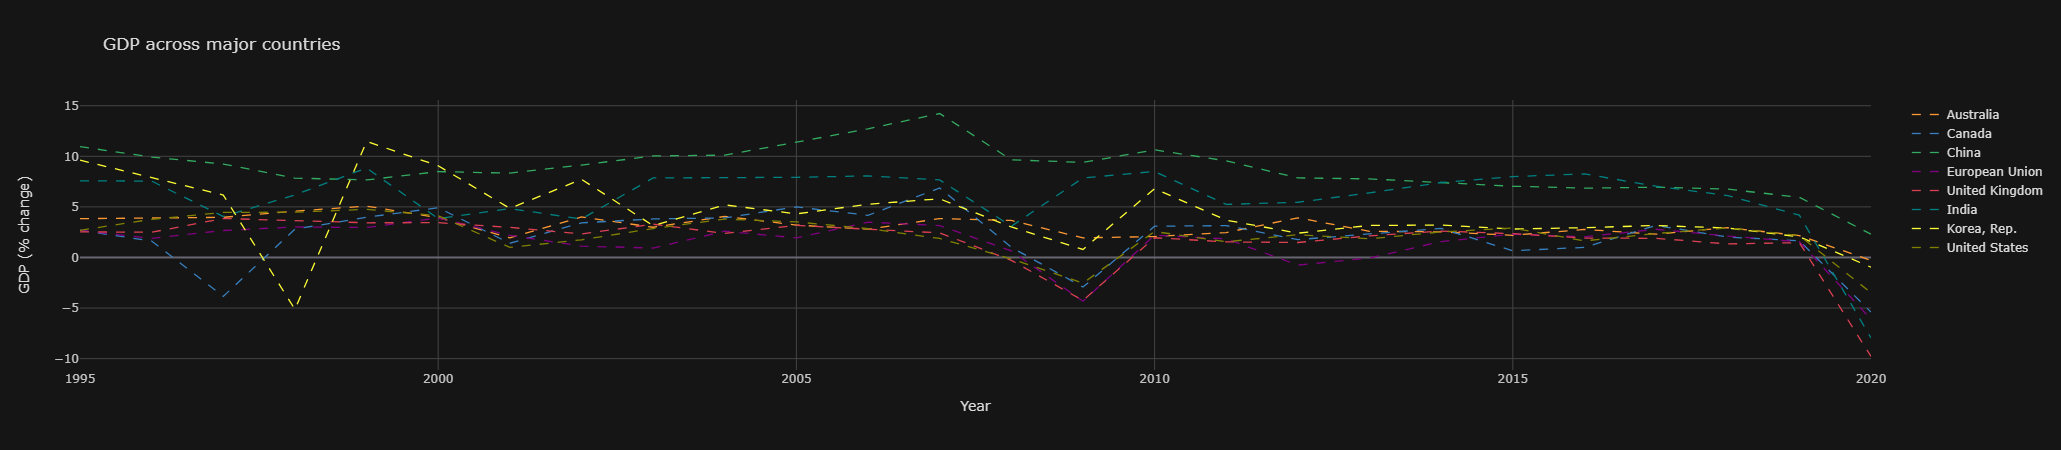

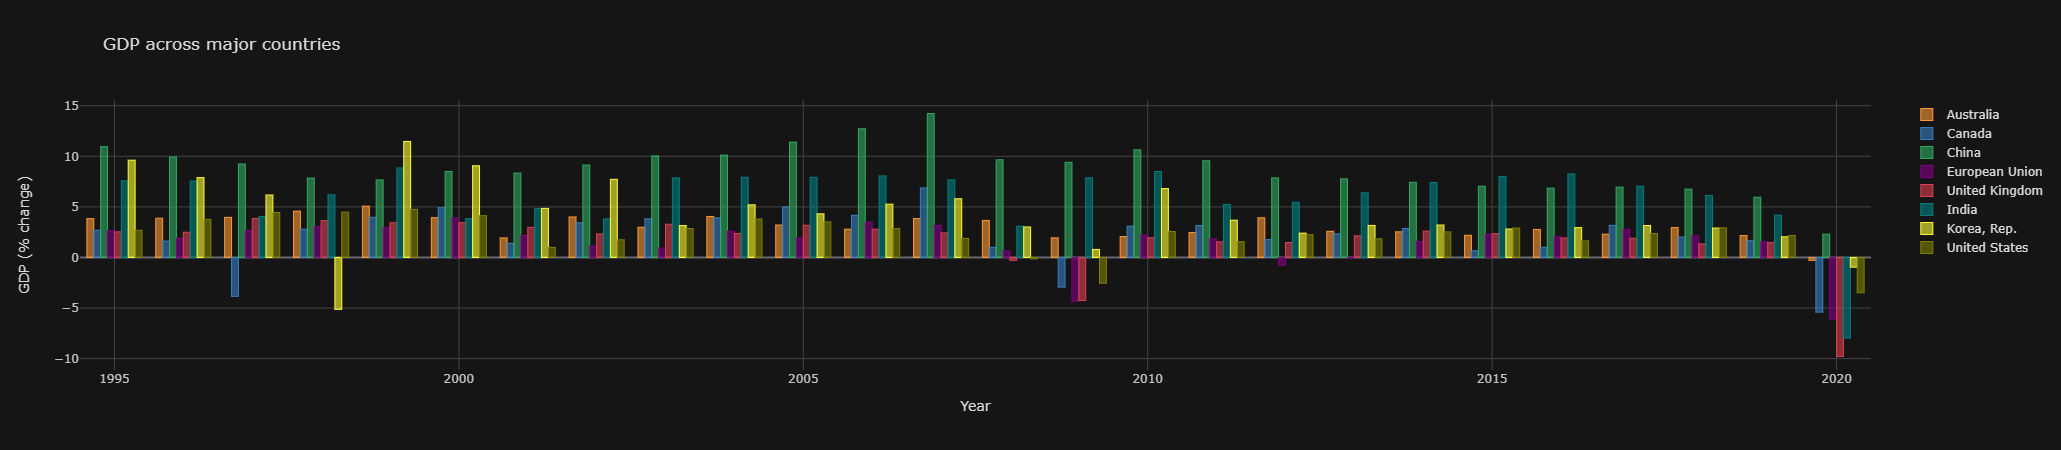

'temp-plot.html'

In [35]:
gdp_fig1 = gdp_new.iplot(kind='line',
                          dash='dash',
                          title="GDP across major countries",
                          xTitle="Year",
                          yTitle='GDP (% change)')             
             
gdp_fig2 = gdp_new.iplot(kind='bar',
                          dash='dash',
                          title="GDP across major countries",
                          xTitle="Year",
                          yTitle='GDP (% change)')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(gdp_fig1)
fig.add_traces(gdp_fig2)

fig['layout'].update(height=600,
                     width=600)                      

### 

### What does Australia's demographic information look like?

In [36]:
year = population[["Year"]]

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

In [44]:
# Create df to correlate
aus_demographics_df = pd.concat([year,      
                                 total_population,
                                 total_employed, 
                                 total_employed_males,
                                 total_employed_females,
                                 total_unemployed,
                                 total_unemployed_males,
                                 total_unemployed_females], axis=1)

# Rename to easy convention
aus_demographics_renamed_df = aus_demographics_df.rename(columns={"EstimatedResidentPopulation": "Pop",
                                                                  "TotalEmployed": "Tot Emp",
                                                                  "TotalEmployed_M": "Tot Emp_M",
                                                                  "TotalEmployed_F": "Tot Emp_F",
                                                                  "TotalUnemployed": "Tot Unemp",
                                                                  "TotalUnemployed_M": "Tot Unemp_M",
                                                                  "TotalUnemployed_F": "Tot Unemp_F"})

#Check dataset
aus_demographics_renamed_df.set_index("Year", inplace=True)
aus_demographics_renamed_df.head()

,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Year,,,,,,,
1995,18004.9,8205.6,4657.4,3548.3,723.5,434.2,289.3
1996,18224.8,8311.7,4724.4,3587.3,723.8,424.3,299.5
1997,18423.0,8345.6,4731.9,3613.6,735.2,427.5,307.7
1998,18607.6,8516.8,4801.8,3715.0,702.8,419.9,282.9
1999,18812.3,8673.2,4897.8,3775.5,600.6,348.6,252.0


In [46]:
aus_demographics_renamed_d2 = aus_demographics_renamed_df.drop("Pop", axis=1)

aus_demographics_renamed_d2.head()

,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Year,,,,,,
1995,8205.6,4657.4,3548.3,723.5,434.2,289.3
1996,8311.7,4724.4,3587.3,723.8,424.3,299.5
1997,8345.6,4731.9,3613.6,735.2,427.5,307.7
1998,8516.8,4801.8,3715.0,702.8,419.9,282.9
1999,8673.2,4897.8,3775.5,600.6,348.6,252.0


In [77]:
# Run correlation
demographic_corr_df = aus_demographics_renamed_df.reset_index()
del demographic_corr_df["Year"]
demographic_corr_df.head()

demographic_corr = demographic_corr_df.corr()
demographic_corr

,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Pop,1.000000,0.988475,0.983934,0.991038,0.363551,0.114982,0.647975
Tot Emp,0.988475,1.000000,0.999140,0.999353,0.228864,-0.022022,0.533304
Tot Emp_M,0.983934,0.999140,1.000000,0.997002,0.207767,-0.043831,0.515813
Tot Emp_F,0.991038,0.999353,0.997002,1.000000,0.246857,-0.003061,0.547741
Tot Unemp,0.363551,0.228864,0.207767,0.246857,1.000000,0.959710,0.927733
Tot Unemp_M,0.114982,-0.022022,-0.043831,-0.003061,0.959710,1.000000,0.785476
Tot Unemp_F,0.647975,0.533304,0.515813,0.547741,0.927733,0.785476,1.000000


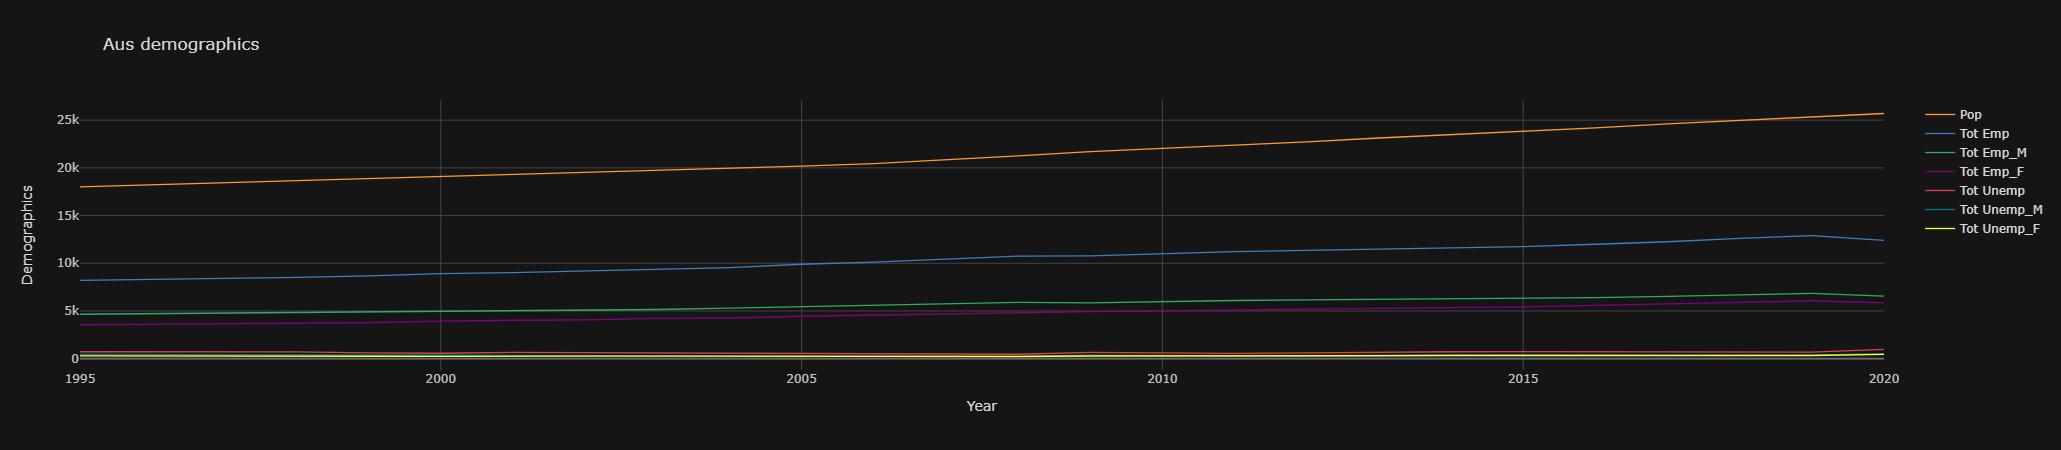

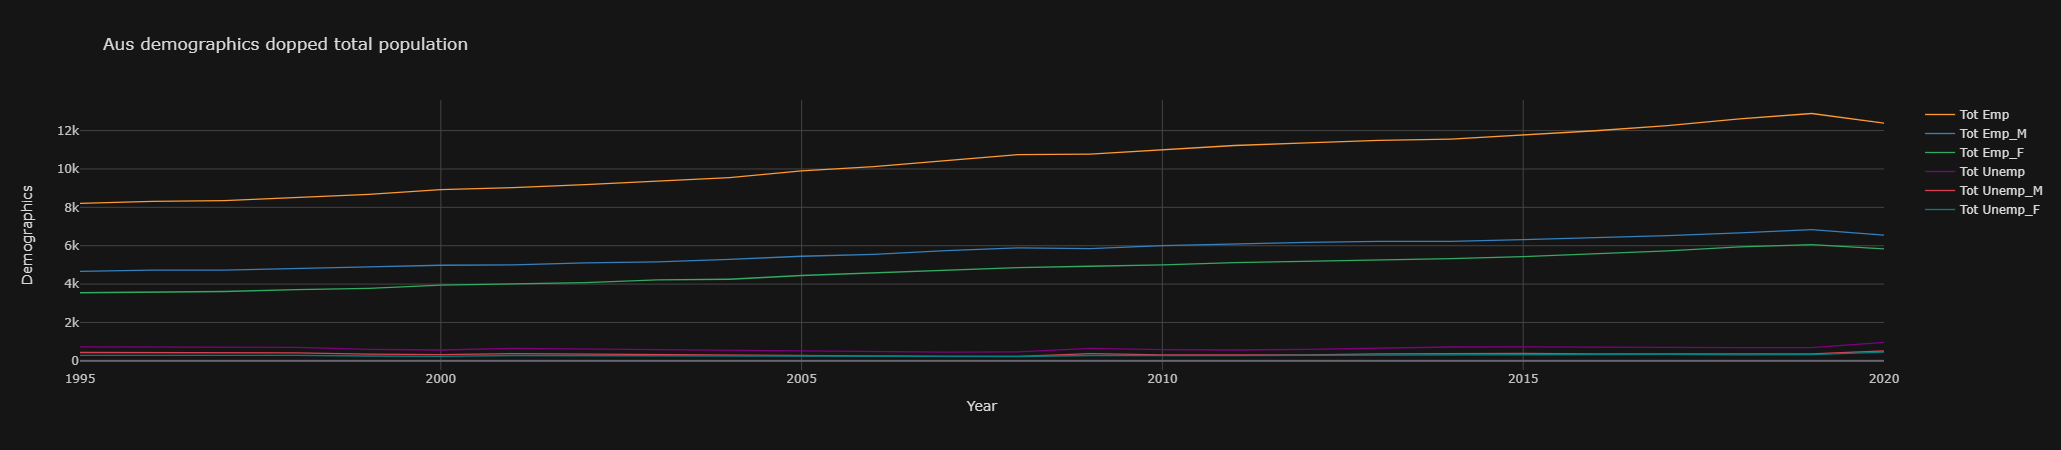

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.7333333333333333, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.36666666666666664, 0.6333333333333333]},
    'yaxis3': {'anchor': 'x3', 'domain': [0.0, 0.26666666666666666]}
})

In [87]:
aus_demographics_fig1 = aus_demographics_renamed_df.iplot(kind='line',
                                             title="Aus demographics",
                                             xTitle="Year",
                                             yTitle='Demographics')         
             
aus_demographics_fig2 = aus_demographics_renamed_d2.iplot(kind='line',
                                                          title="Aus demographics dopped total population",
                                                          xTitle="Year",
                                                          yTitle='Demographics')  

#Create the plot matrix:
fig = subplots.make_subplots(rows=3, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(aus_demographics_fig1)
fig.add_traces(aus_demographics_fig2)

fig['layout'].update(height=600,
                     width=600)

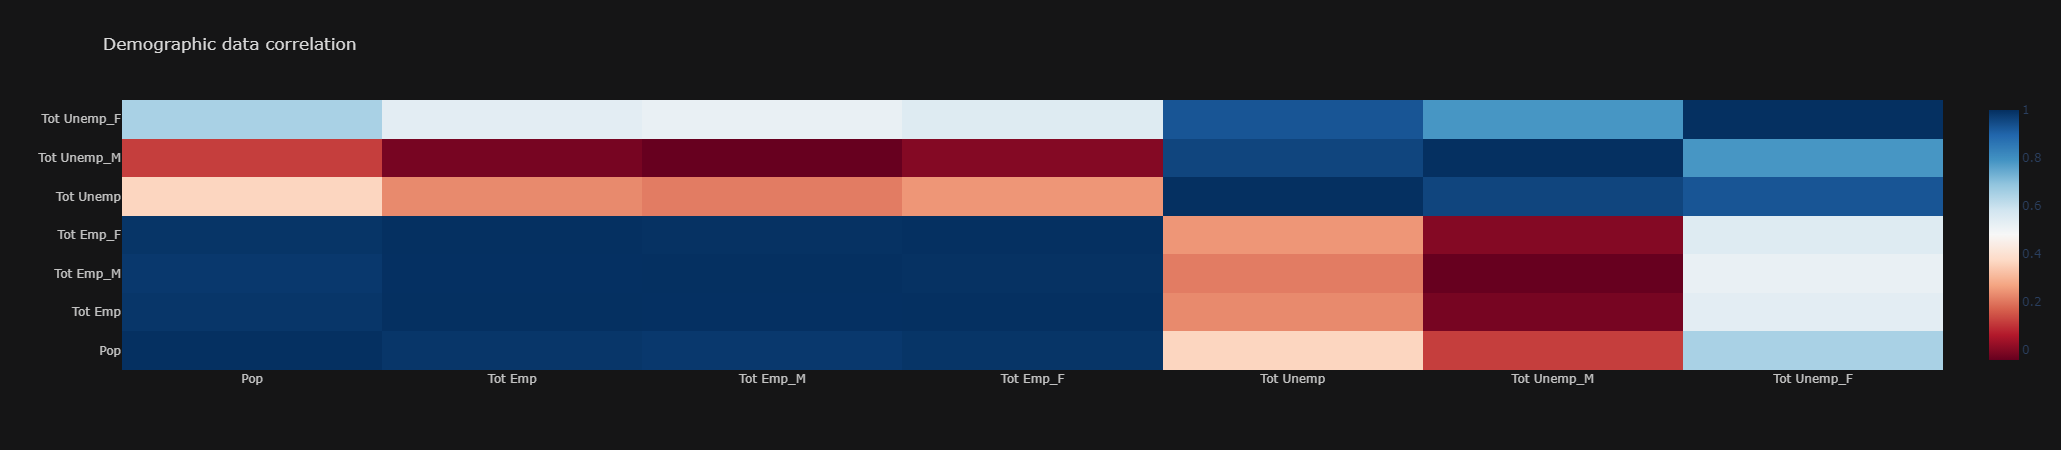

In [88]:
#cf.help("heatmap")
demographic_corr_plot = demographic_corr.iplot(kind='heatmap',
                                               title="Demographic data correlation",
                                               asFigure=True,
                                               asImage=True,
                                               colorscale='rdbu')
demographic_corr_plot

Text(0.5, 1.0, 'Aus demographic data')

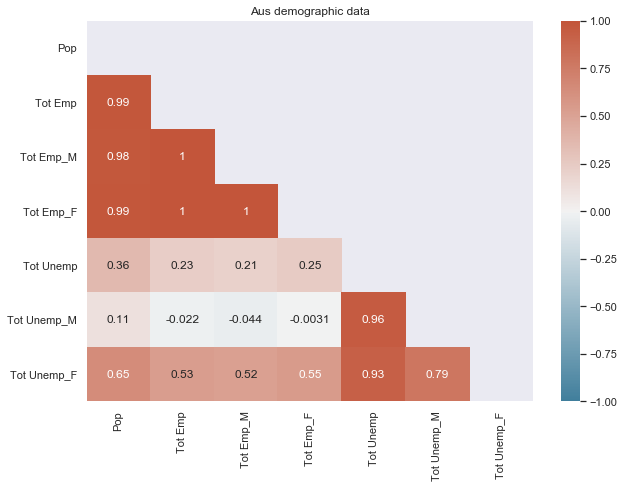

In [105]:
# Using Seaborn
matrix = np.triu(demographic_corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(demographic_corr, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)

sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus demographic data')

### 

### What does Australia's financials look like?

In [52]:
year = population[["Year"]]
cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]

In [55]:
# Create Aus financials dataframe
# Create df to correlate
aus_financials_df = pd.concat([year,
                               cash_rate_target,
                               overnight_cash_rate,
                               household_income_total,
                               household_savings_total,
                               net_savings,
                               gross_income], axis=1)

# Rename to easy convention
aus_financials_renamed_df = aus_financials_df.rename(columns={"Total Use of Gross Income": "Gross Income"})

#Check dataset
aus_financials_renamed_df.set_index("Year", inplace=True)
aus_financials_renamed_df.head()

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Year,,,,,,
1995,7.50,7.51,107093,313,313,107093
1996,7.50,7.51,113630,853,853,113630
1997,5.50,5.57,120328,1617,1617,120328
1998,5.00,5.07,124565,-1596,-1596,124565
1999,4.75,4.76,133049,-1208,-1208,133049


In [57]:
aus_financials_renamed_d2 = aus_financials_renamed_df.drop("Gross Income", axis=1)

aus_financials_renamed_d2.head()

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings
Year,,,,,
1995,7.50,7.51,107093,313,313
1996,7.50,7.51,113630,853,853
1997,5.50,5.57,120328,1617,1617
1998,5.00,5.07,124565,-1596,-1596
1999,4.75,4.76,133049,-1208,-1208


In [91]:
# Run correlation
aus_financials_corr_df = aus_financials_renamed_df.reset_index()
del aus_financials_corr_df["Year"]
aus_financials_corr = aus_financials_corr_df.corr()
aus_financials_corr

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Cash Rate Target,1.000000,0.999915,-0.848601,-0.492007,-0.492007,-0.848601
Interbank Overnight Cash Rate,0.999915,1.000000,-0.850912,-0.499262,-0.499262,-0.850912
TotalIncome,-0.848601,-0.850912,1.000000,0.456788,0.456788,1.000000
TotalSavings,-0.492007,-0.499262,0.456788,1.000000,1.000000,0.456788
Net Savings,-0.492007,-0.499262,0.456788,1.000000,1.000000,0.456788
Gross Income,-0.848601,-0.850912,1.000000,0.456788,0.456788,1.000000


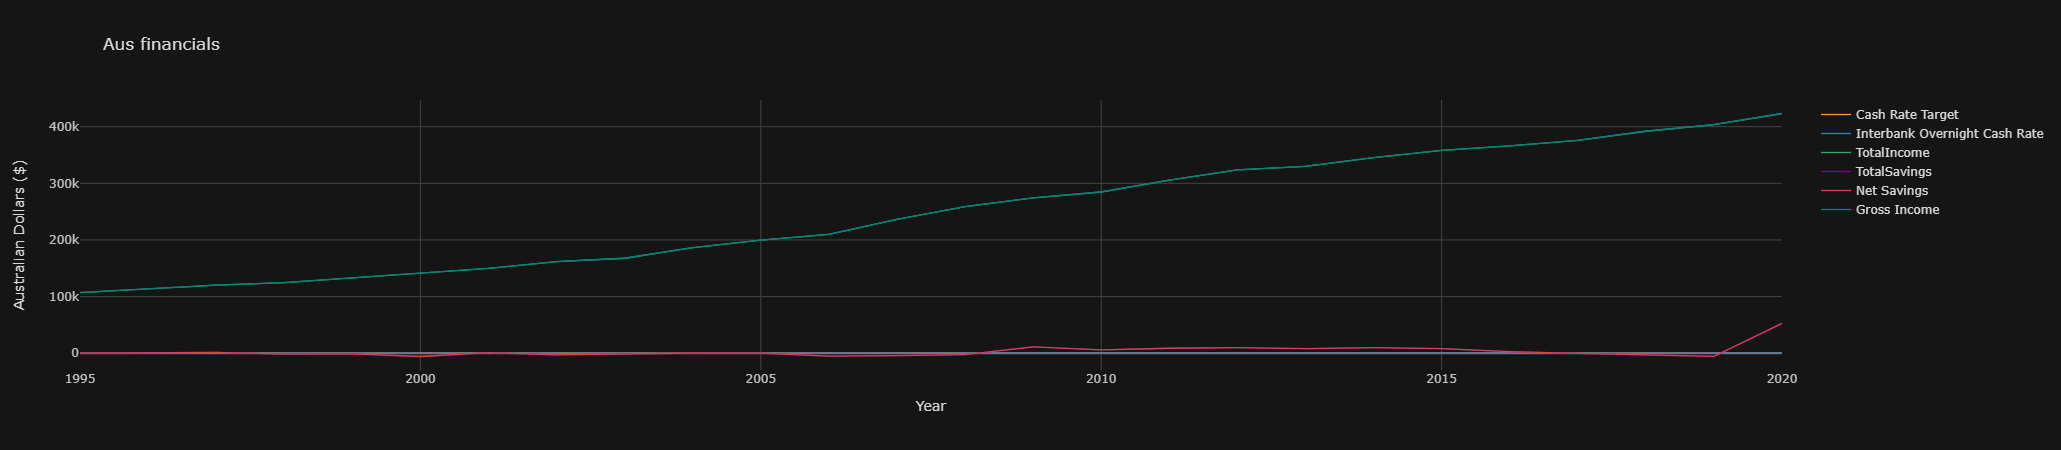

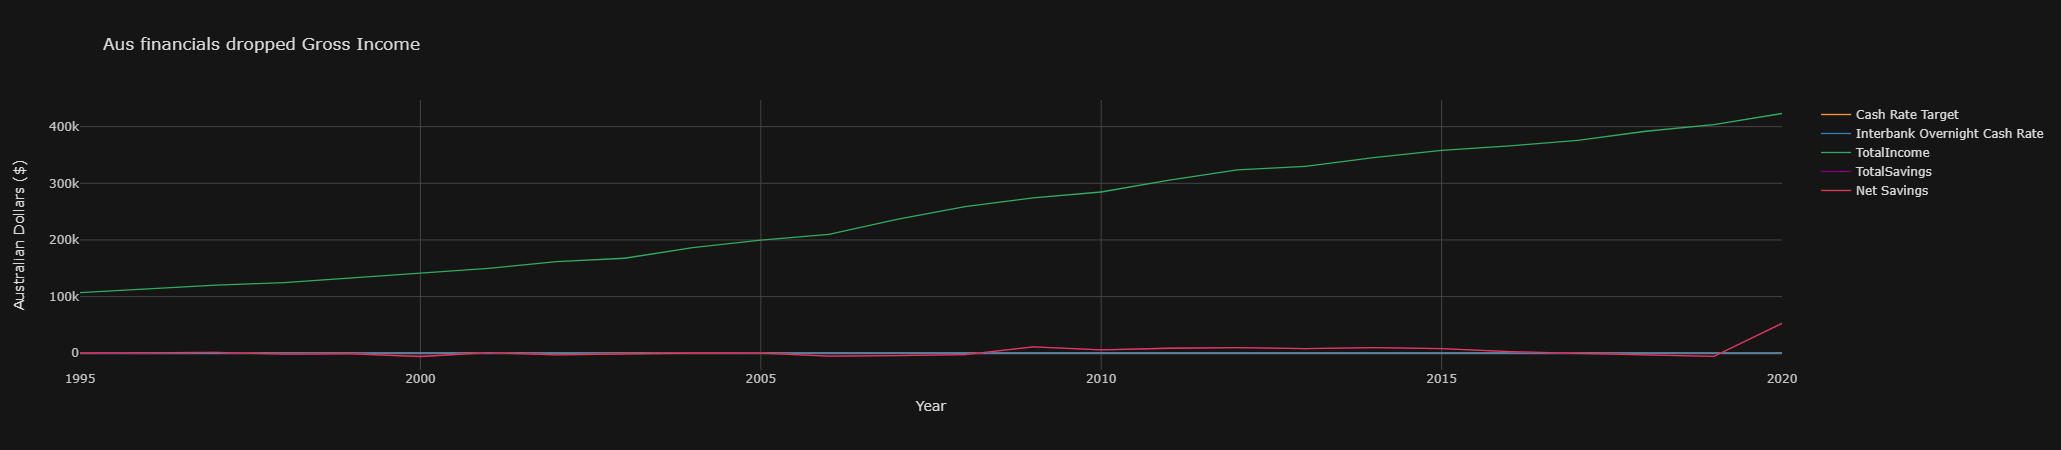

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [58]:
aus_demographics_fig1 = aus_financials_renamed_df.iplot(kind='line',
                                                        title="Aus financials",
                                                        xTitle="Year",
                                                        yTitle='Australian Dollars ($)')        
             
aus_demographics_fig2 = aus_financials_renamed_d2.iplot(kind='line',
                                                        title="Aus financials dropped Gross Income",
                                                        xTitle="Year",
                                                        yTitle='Australian Dollars ($)')    

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(aus_demographics_fig1)
fig.add_traces(aus_demographics_fig2)

fig['layout'].update(height=600,
                     width=600)

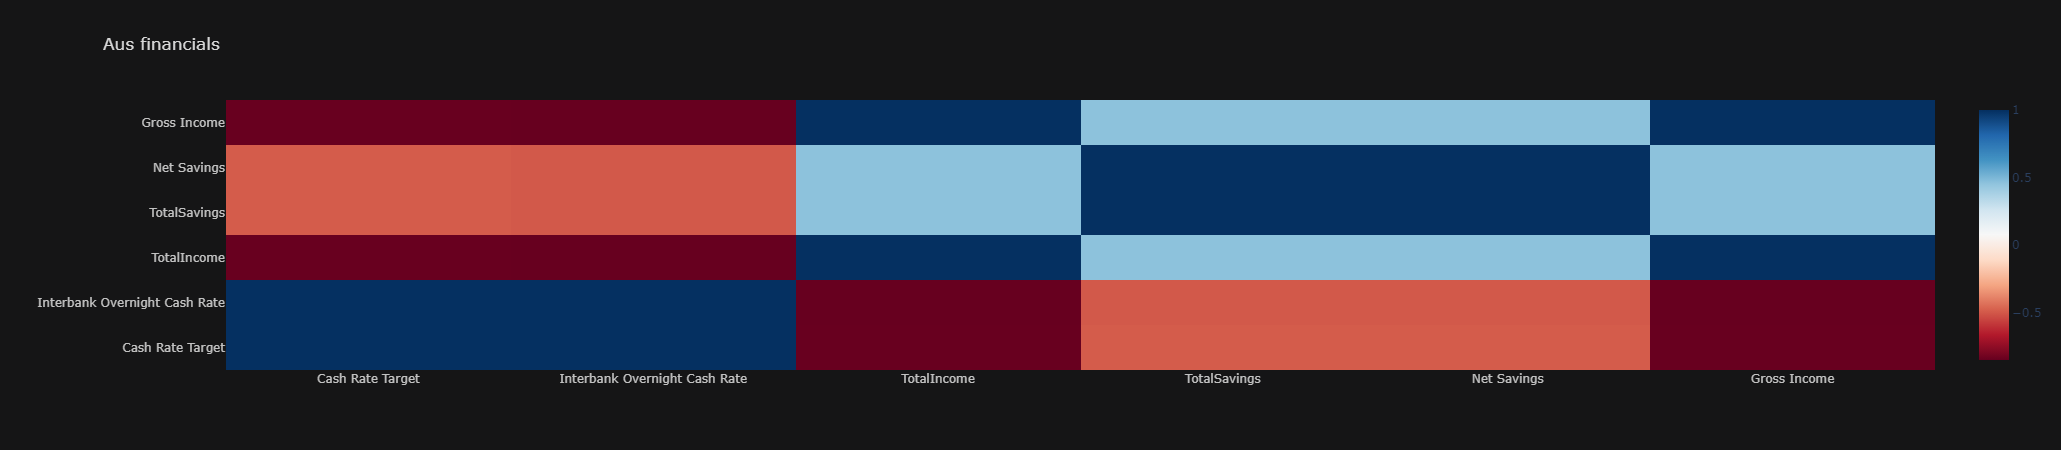

In [90]:
aus_financials_corr_plot = aus_financials_corr.iplot(kind='heatmap',
                                                     title="Aus financials",
                                                     asFigure=True,
                                                     asImage=True,
                                                     colorscale='rdbu')
aus_financials_corr_plot

Text(0.5, 1.0, 'Aus financials')

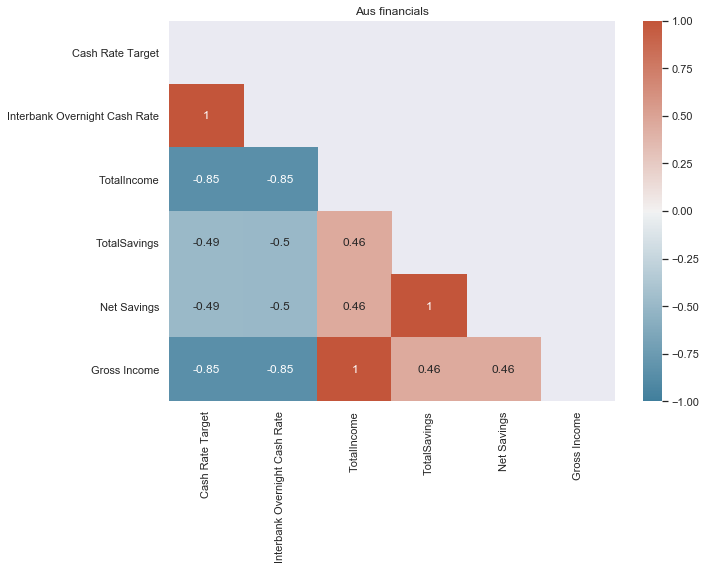

In [104]:
# Using Seaborn
matrix = np.triu(aus_financials_corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(aus_financials_corr, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)

sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus financials')

## 

### What are the key factors driving GDP - demonstrate using CorrPlot


In [94]:
# Clean population data
del population["Unnamed: 0"]
population.head()

,Year,Births,Deaths,NaturalIncreases,InterstateArrivals,OverseasArrivals,OverseasDepartures,NetOverseasDepartures,NetOverseasMigration,EstimatedResidentPopulation,PercenChangeOverThePreviousYear
0,1995,64.3,31.5,32.8,96.0,50.5,32.7,32.7,23.8,18004.9,1.12
1,1996,62.0,31.7,30.3,84.8,49.9,34.2,34.2,20.6,18224.8,1.22
2,1997,63.6,31.4,32.2,90.0,49.5,38.9,38.9,6.1,18423.0,1.09
3,1998,62.3,31.8,30.5,89.4,54.1,45.6,45.6,8.5,18607.6,1.00
4,1999,62.7,32.2,30.5,89.2,55.6,40.8,40.8,14.8,18812.3,1.10


In [95]:
# Get data to run correlation
year = population[["Year"]]
gdp_aus_new = gdp_new[["Australia"]].reset_index(drop=True)

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]

In [96]:
# Create df to correlate
correlation_df = pd.concat([gdp_aus_new,
                            total_population,
                            total_employed, 
                            total_employed_males,
                            total_employed_females,
                            total_unemployed,
                            total_unemployed_males,
                            total_unemployed_females,
                            cash_rate_target,
                            overnight_cash_rate,
                            household_income_total,
                            household_savings_total,
                            net_savings,
                            gross_income], axis=1)

# Rename to easy convention
correlation_renamed_df = correlation_df.rename(columns={"Australia": "Aus_GDP",
                                                        "EstimatedResidentPopulation": "Pop",
                                                        "TotalEmployed": "Tot Emp",
                                                        "TotalEmployed_M": "Tot Emp_M",
                                                        "TotalEmployed_F": "Tot Emp_F",
                                                        "TotalUnemployed": "Tot Unemp",
                                                        "TotalUnemployed_M": "Tot Unemp_M",
                                                        "TotalUnemployed_F": "Tot Unemp_F",
                                                        "Total Use of Gross Income": "Gross Income"})

#Check dataset
correlation_renamed_df.head()

,Aus_GDP,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
0,3.837755,18004.9,8205.6,4657.4,3548.3,723.5,434.2,289.3,7.50,7.51,107093,313,313,107093
1,3.878585,18224.8,8311.7,4724.4,3587.3,723.8,424.3,299.5,7.50,7.51,113630,853,853,113630
2,3.966538,18423.0,8345.6,4731.9,3613.6,735.2,427.5,307.7,5.50,5.57,120328,1617,1617,120328
3,4.576689,18607.6,8516.8,4801.8,3715.0,702.8,419.9,282.9,5.00,5.07,124565,-1596,-1596,124565
4,5.073599,18812.3,8673.2,4897.8,3775.5,600.6,348.6,252.0,4.75,4.76,133049,-1208,-1208,133049


In [97]:
correlation = correlation_renamed_df.corr()
correlation

,Aus_GDP,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Aus_GDP,1.000000,-0.691931,-0.656788,-0.639940,-0.670489,-0.491373,-0.325596,-0.649577,0.648218,0.654225,-0.682152,-0.691543,-0.691543,-0.682152
Pop,-0.691931,1.000000,0.988475,0.983934,0.991038,0.363551,0.114982,0.647975,-0.876944,-0.879178,0.995997,0.450761,0.450761,0.995997
Tot Emp,-0.656788,0.988475,1.000000,0.999140,0.999353,0.228864,-0.022022,0.533304,-0.817632,-0.819762,0.992518,0.370157,0.370157,0.992518
Tot Emp_M,-0.639940,0.983934,0.999140,1.000000,0.997002,0.207767,-0.043831,0.515813,-0.802005,-0.804060,0.990877,0.361270,0.361270,0.990877
Tot Emp_F,-0.670489,0.991038,0.999353,0.997002,1.000000,0.246857,-0.003061,0.547741,-0.830057,-0.832250,0.992560,0.377359,0.377359,0.992560
Tot Unemp,-0.491373,0.363551,0.228864,0.207767,0.246857,1.000000,0.959710,0.927733,-0.577171,-0.577743,0.325373,0.650468,0.650468,0.325373
Tot Unemp_M,-0.325596,0.114982,-0.022022,-0.043831,-0.003061,0.959710,1.000000,0.785476,-0.386829,-0.386224,0.073991,0.526550,0.526550,0.073991
Tot Unemp_F,-0.649577,0.647975,0.533304,0.515813,0.547741,0.927733,0.785476,1.000000,-0.757456,-0.759517,0.618355,0.733091,0.733091,0.618355
Cash Rate Target,0.648218,-0.876944,-0.817632,-0.802005,-0.830057,-0.577171,-0.386829,-0.757456,1.000000,0.999915,-0.848601,-0.492007,-0.492007,-0.848601
Interbank Overnight Cash Rate,0.654225,-0.879178,-0.819762,-0.804060,-0.832250,-0.577743,-0.386224,-0.759517,0.999915,1.000000,-0.850912,-0.499262,-0.499262,-0.850912


In [101]:
heatmap_plot = correlation.hvplot.heatmap(title="Aus economy",
                                          ymarks_hover_color='cyan',
                                          hover_color='cyan',
                                          alpha=0.9,
                                          colorbar=True,
                                          cmap='bjy')
heatmap_plot

:HeatMap   [columns,index]   (value)

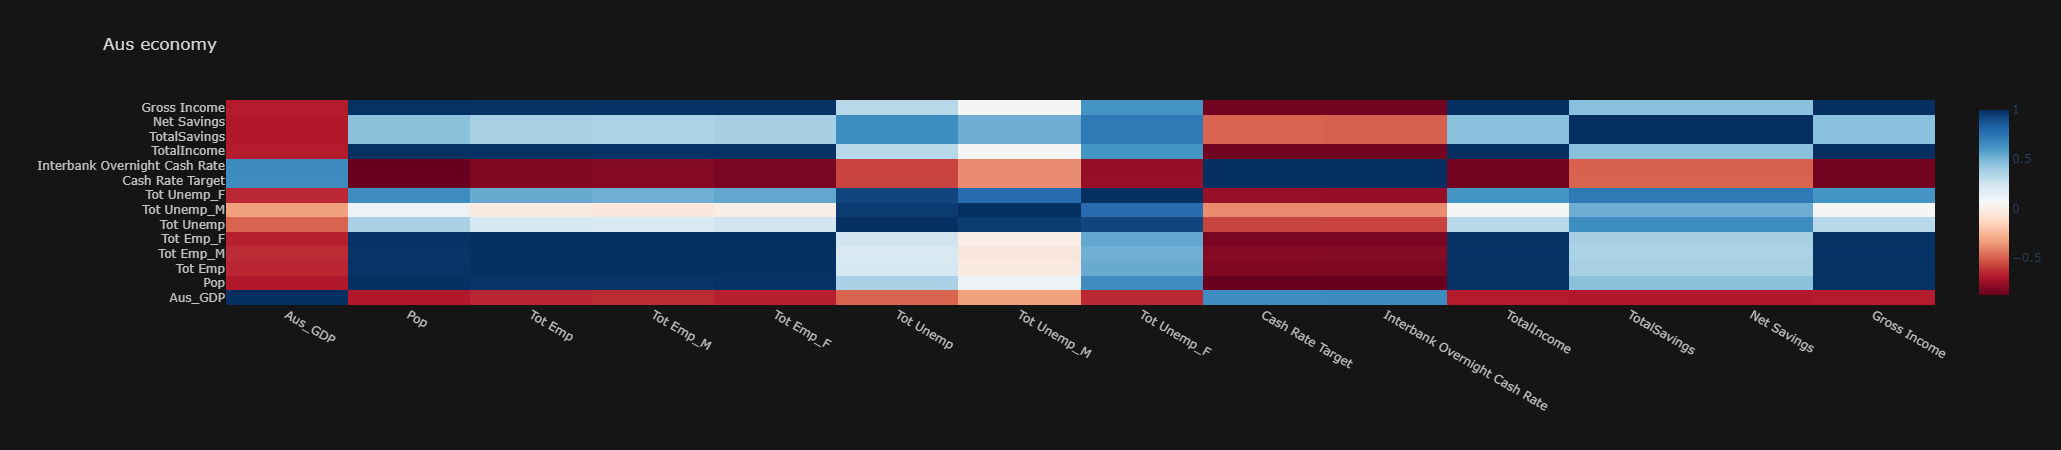

In [100]:
corrplot = correlation.iplot(kind='heatmap',
                             title="Aus economy",
                             asFigure=True,
                             asImage=True,
                             colorscale='rdbu')
corrplot

Text(0.5, 1.0, 'Aus Economy')

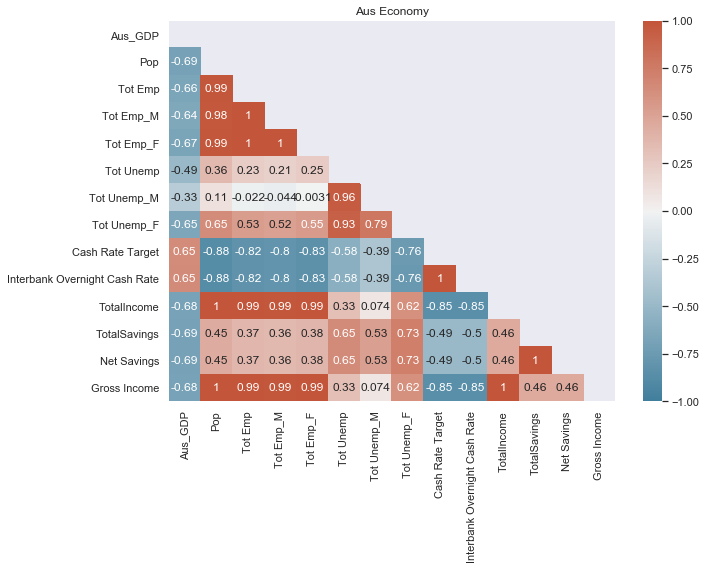

In [103]:
# Using Seaborn
matrix = np.triu(correlation)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(correlation, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)


sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus Economy')

### 

### Read in all csv files for analysis for World

In [107]:
gdp_growth = pd.read_csv("../Data/ProcessedData/aus_vs_world_gdp_growth_cleaned.csv")
goods_export = pd.read_csv("../Data/ProcessedData/aus_vs_world_goods_export_cleaned.csv")
world_inflation = pd.read_csv("../Data/ProcessedData/aus_vs_world_inflation_cleaned.csv")
world_population = pd.read_csv("../Data/ProcessedData/aus_vs_world_population_cleaned.csv")

In [120]:
gdp_growth_clean = gdp_growth.drop('Unnamed: 0', axis=1).set_index("Year")

gdp_growth_line = gdp_growth_clean.hvplot.line(title='GDP growth',
                                               ylabel='Percentage change')
gdp_growth_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [124]:
gdp_growth["Year"] = gdp_growth.Year.astype(str)

gdp_growth_clean2 = gdp_growth.drop('Unnamed: 0', axis=1)
gdp_growth_bar = gdp_growth_clean2.hvplot.bar(groupby="Year")
gdp_growth_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [126]:
gdp_growth_comb = gdp_growth_line + gdp_growth_bar
gdp_growth_comb

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

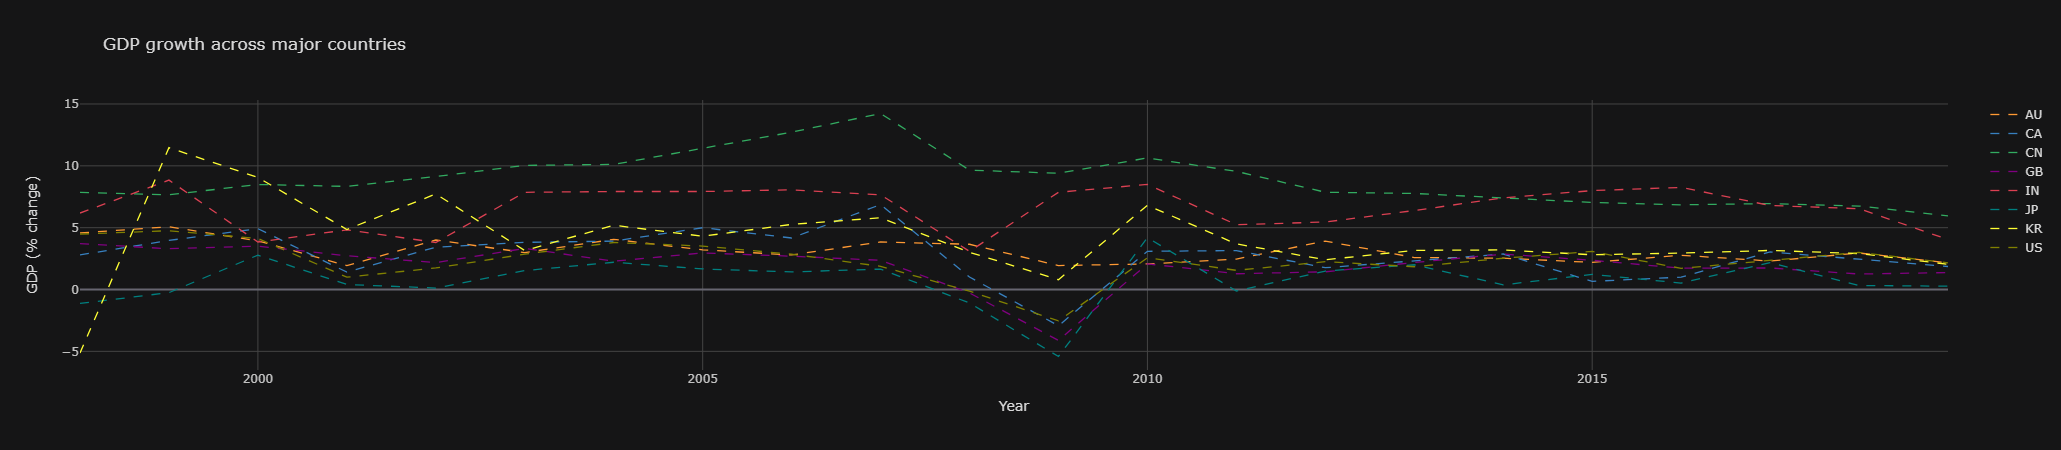

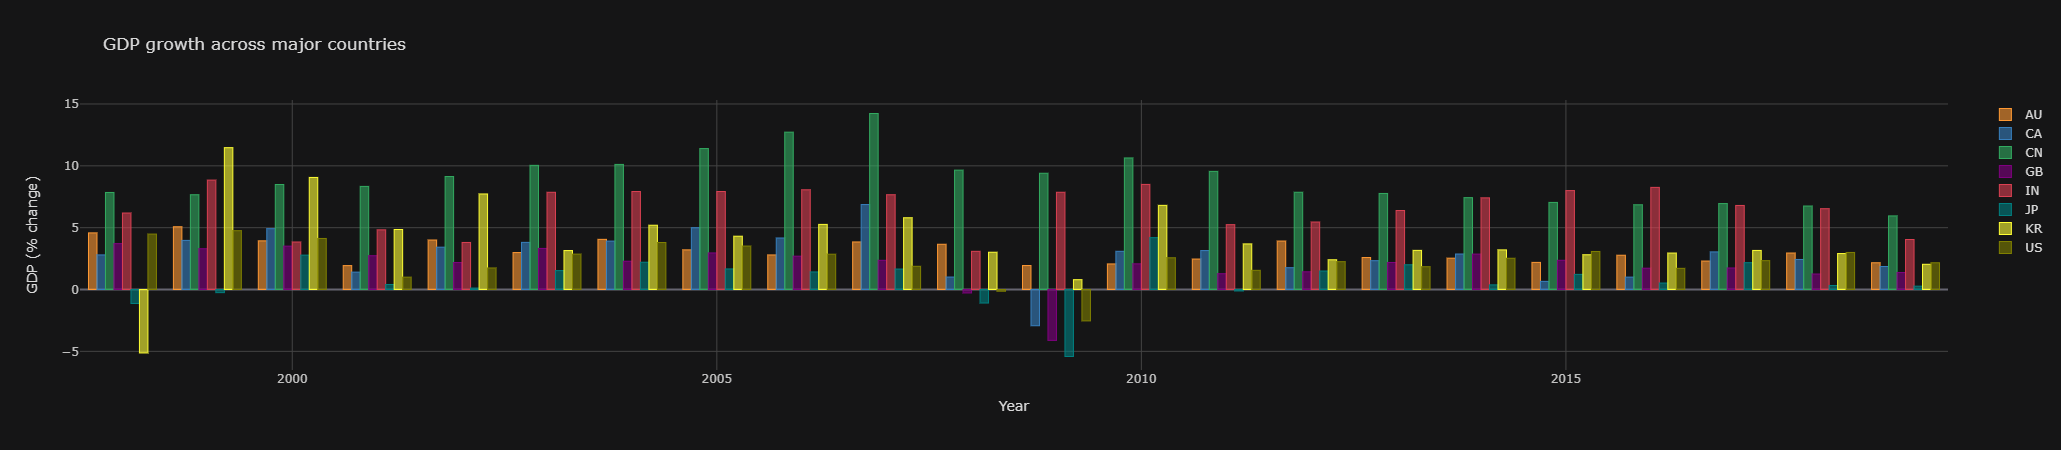

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [130]:
gdp_growth_fig1 = gdp_growth_clean.iplot(kind='line',
                                         dash='dash',
                                         title="GDP growth across major countries",
                                         xTitle="Year",
                                         yTitle='GDP (% change)')             
             
gdp_growth_fig2 = gdp_growth_clean.iplot(kind='bar',
                                         dash='dash',
                                         title="GDP growth across major countries",
                                         xTitle="Year",
                                         yTitle='GDP (% change)')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(gdp_growth_fig1)
fig.add_traces(gdp_growth_fig2)

fig['layout'].update(height=600,
                     width=600) 

## 